#### PBL Project 

### Workflow
+ Dataset Preparation
+ EDA
+ Keyword Extraction
+ Recommendation System
+ ML Predictive Analysis
+ Productionize System with Streamlit


### EDA

In [3]:
# Load EDA Packages
import pandas as pd
import numpy as np

In [4]:
# Load Data Visualisation Packages
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
# Hiding all warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading Dataset
df = pd.read_csv("dataset.csv")

In [7]:
df.head()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1,614832,Discrete Mathematics,https://www.udemy.com/course/discrete-math/,True,3099,22437,3219,124,All Levels,19 hours,Discrete Mathematics
1,2,1528598,"Master Discrete Mathematics: Sets, Math Logic,...",https://www.udemy.com/course/master-discrete-m...,True,2499,9114,1398,46,All Levels,7 hours,Discrete Mathematics
2,3,1240674,"Discrete Mathematics: Beginner's Complete, Mat...",https://www.udemy.com/course/master-discrete-m...,True,2299,6303,152,72,All Levels,4 hours,Discrete Mathematics
3,4,1765308,Master Discrete Math 2020: More Than 5 Complet...,https://www.udemy.com/course/discrete/,True,2999,23427,438,157,All Levels,16 hours,Discrete Mathematics
4,5,829846,Graph Theory,https://www.udemy.com/course/graph-theory/,True,3099,8104,912,67,All Levels,10 hours,Discrete Mathematics


### EDA on Subject
+ Subjects/Category
  - What is the distribution of the subjects
  - Number of Courses per subject
  - How many people purchase courses of a particular subject
  - Which subject is the most popular

In [8]:
df.columns

Index(['Unnamed: 0', 'course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'subject'],
      dtype='object')

In [9]:
# How many subjects are there in the dataset
df['subject'].unique()

array(['Discrete Mathematics', 'FDS/DSA', 'Object Oriented Programming',
       'Computer Graphics', 'DELD', 'Software Engineering',
       'Engg. Maths III', 'Microprocessors', 'PPL'], dtype=object)

In [10]:
# How many subjects are there in the dataset
len(df['subject'].unique())

9

In [11]:
#Distribution of Subject Counts
df['subject'].value_counts()

subject
FDS/DSA                        27
Object Oriented Programming    22
PPL                            17
Discrete Mathematics           16
DELD                           16
Computer Graphics              13
Engg. Maths III                13
Software Engineering           11
Microprocessors                 6
Name: count, dtype: int64

<Axes: xlabel='subject'>

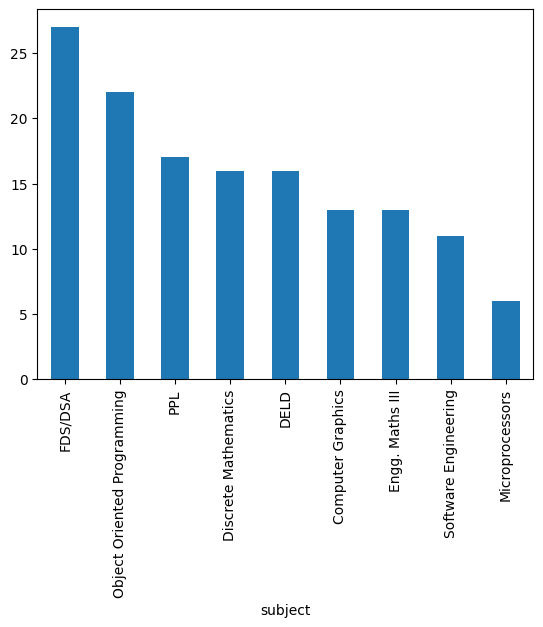

In [12]:
# Plot Distribution of Subject Counts
df['subject'].value_counts().plot(kind='bar')

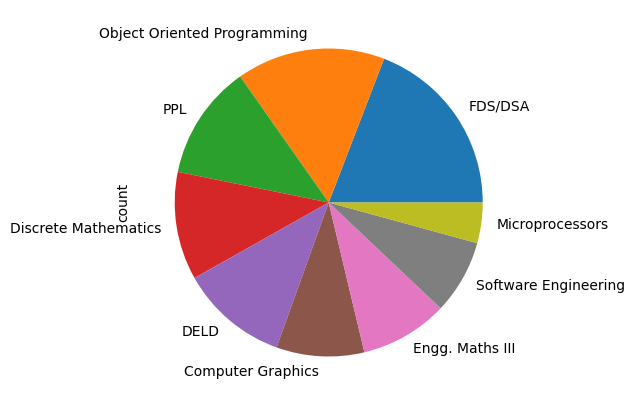

In [13]:
# Plot Distribution of Subject Counts(Pie Chart)
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

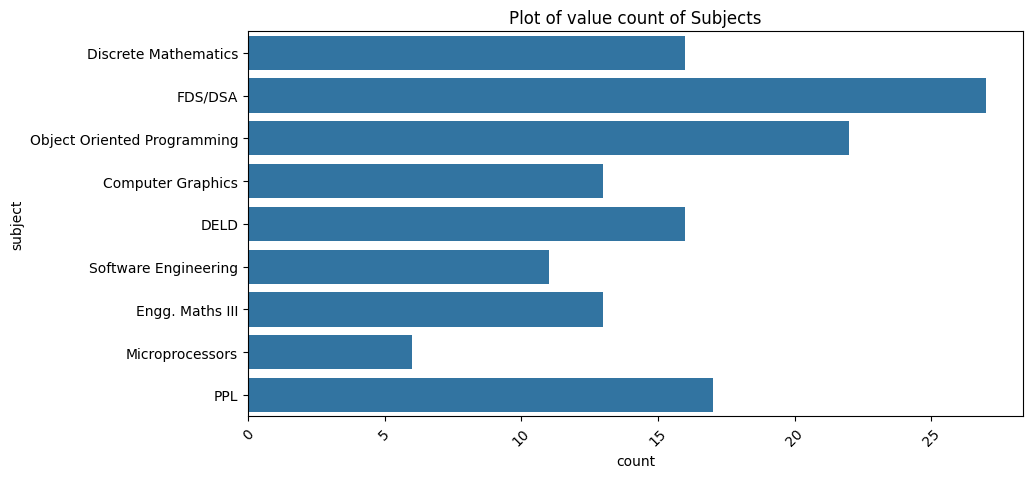

In [14]:
# Method 2: using seaborn
plt.figure(figsize=(10,5))
sns.countplot(df['subject'])
plt.title("Plot of value count of Subjects")
plt.xticks(rotation=45)
plt.show()

### EDA on subrcibers
+ Subscribers
  - Which course has the highest number of subscribers
  - Average No. of subscribers
  - Number of subscribers per subject

In [15]:
df.head()

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1,614832,Discrete Mathematics,https://www.udemy.com/course/discrete-math/,True,3099,22437,3219,124,All Levels,19 hours,Discrete Mathematics
1,2,1528598,"Master Discrete Mathematics: Sets, Math Logic,...",https://www.udemy.com/course/master-discrete-m...,True,2499,9114,1398,46,All Levels,7 hours,Discrete Mathematics
2,3,1240674,"Discrete Mathematics: Beginner's Complete, Mat...",https://www.udemy.com/course/master-discrete-m...,True,2299,6303,152,72,All Levels,4 hours,Discrete Mathematics
3,4,1765308,Master Discrete Math 2020: More Than 5 Complet...,https://www.udemy.com/course/discrete/,True,2999,23427,438,157,All Levels,16 hours,Discrete Mathematics
4,5,829846,Graph Theory,https://www.udemy.com/course/graph-theory/,True,3099,8104,912,67,All Levels,10 hours,Discrete Mathematics


In [16]:
# Number of subscribers per subject
df.groupby('subject')['num_subscribers'].sum()

subject
Computer Graphics               714774
DELD                            242722
Discrete Mathematics            135230
Engg. Maths III                 175138
FDS/DSA                         854087
Microprocessors                  19388
Object Oriented Programming     697292
PPL                            4806620
Software Engineering            421587
Name: num_subscribers, dtype: int64

<Axes: xlabel='subject'>

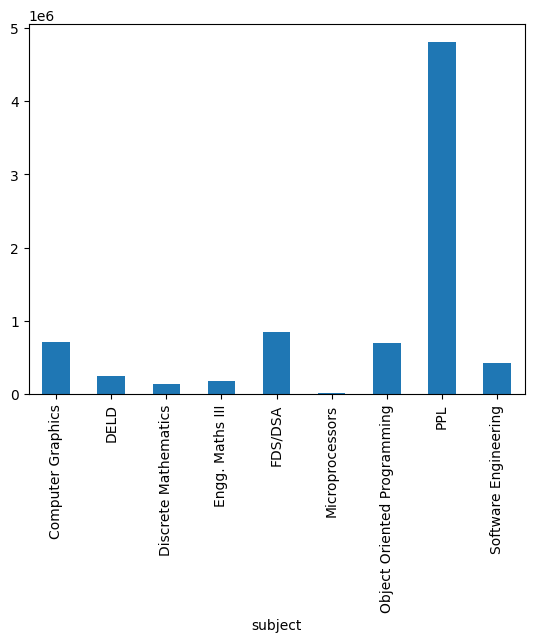

In [17]:
# Plot of the number of subscribers per subject
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')

<Axes: ylabel='num_subscribers'>

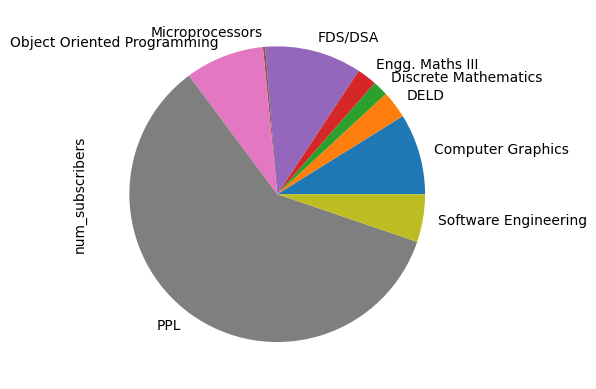

In [18]:
# Plot of the number of subscribers per subject(Pie Chart)
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

### Narrative
+ The top subject category is PPL

In [19]:
# Total number of subscribers
df['num_subscribers'].sum()

8066838

In [20]:
#Average number of subscribers
df['num_subscribers'].mean()

57211.617021276594

In [21]:
#Minimum number of subscribers
df['num_subscribers'].min()

45

In [22]:
#Maximum number of subscribers
df['num_subscribers'].max()

898555

In [23]:
#Which course has maximum number of subscribers
df['num_subscribers'].idxmax()

127

In [24]:
#Get the location
df.iloc[127]

Unnamed: 0                                                        128
course_id                                                      851712
course_title        The Complete JavaScript Course 2024: From Zero...
url                 https://www.udemy.com/course/the-complete-java...
is_paid                                                          True
price                                                            3499
num_subscribers                                                898555
num_reviews                                                    203691
num_lectures                                                      321
level                                                      All Levels
content_duration                                           68.5 hours
subject                                                           PPL
Name: 127, dtype: object

### Narrative
+ Courses in the dataset have over 80 lakh(8 million) subscribers
+ Highest number of subscribers: 898555
+ Average number of subscribers: 57212

#### EDA on levels
+ Levels 
  - How many levels do we have
  - Which subject have the highest levels
  - How many subscribers per level
  - How many courses per level

In [25]:
# How many levels do we have
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [26]:
# What is the distribution of courses per level
df['level'].value_counts()

level
All Levels            92
Beginner Level        25
Intermediate Level    21
Expert Level           3
Name: count, dtype: int64

<Axes: xlabel='level'>

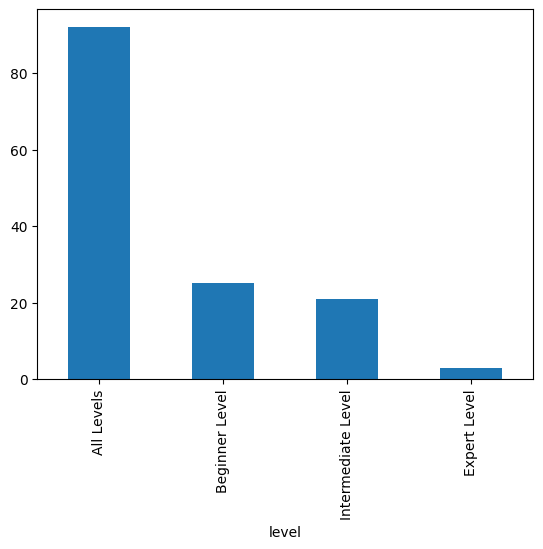

In [27]:
#Plot of distribution of courses per level
df['level'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

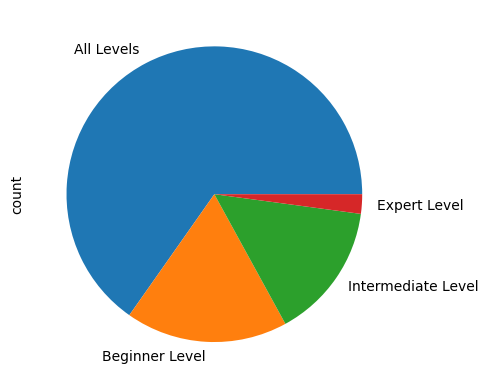

In [31]:
#Plot of distribution of courses per level(Pie Chart)
df['level'].value_counts().plot(kind='pie')

In [30]:
#How many subsrcibers for a level
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6837283
Beginner Level         746520
Expert Level             8388
Intermediate Level     474647
Name: num_subscribers, dtype: int64

In [33]:
df[['num_subscribers','level']]

,num_subscribers,level
0,22437,All Levels
1,9114,All Levels
2,6303,All Levels
3,23427,All Levels
4,8104,All Levels
...,...,...
136,12874,All Levels
137,1135,Beginner Level
138,35546,Beginner Level
139,5684,All Levels


<Axes: xlabel='level'>

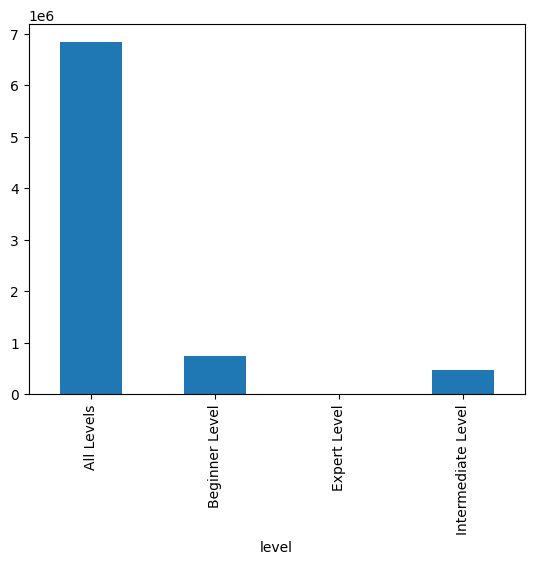

In [34]:
#Plot of no. of subsrcibers for a level
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')

<Axes: ylabel='num_subscribers'>

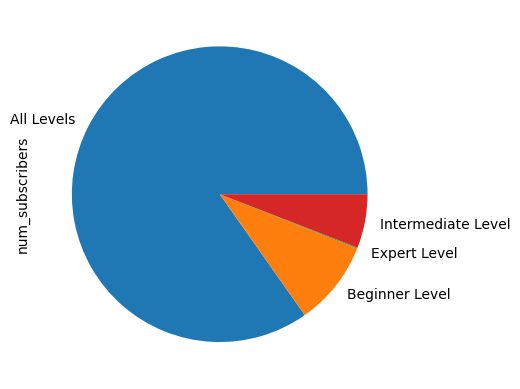

In [35]:
#Plot of no. of subsrcibers for a level(Pie Chart)
df.groupby('level')['num_subscribers'].sum().plot(kind='pie')

In [36]:
#How many levels per subject
df.groupby('subject')['level'].value_counts()

subject                      level             
Computer Graphics            All Levels             7
                             Intermediate Level     4
                             Beginner Level         2
DELD                         All Levels             8
                             Beginner Level         6
                             Expert Level           1
                             Intermediate Level     1
Discrete Mathematics         All Levels            11
                             Beginner Level         3
                             Expert Level           1
                             Intermediate Level     1
Engg. Maths III              All Levels             8
                             Beginner Level         3
                             Expert Level           1
                             Intermediate Level     1
FDS/DSA                      All Levels            21
                             Beginner Level         3
                             Inter

<Axes: xlabel='subject,level'>

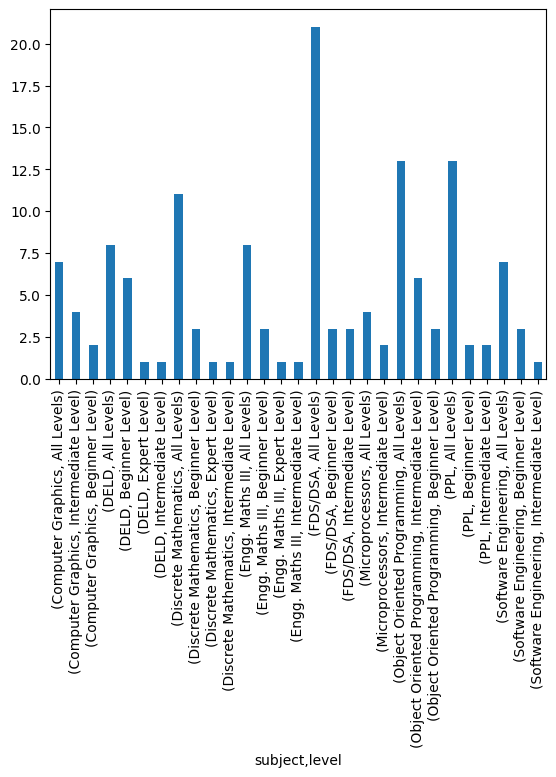

In [37]:
#Plot of how many levels per subject
df.groupby('subject')['level'].value_counts().plot(kind='bar')

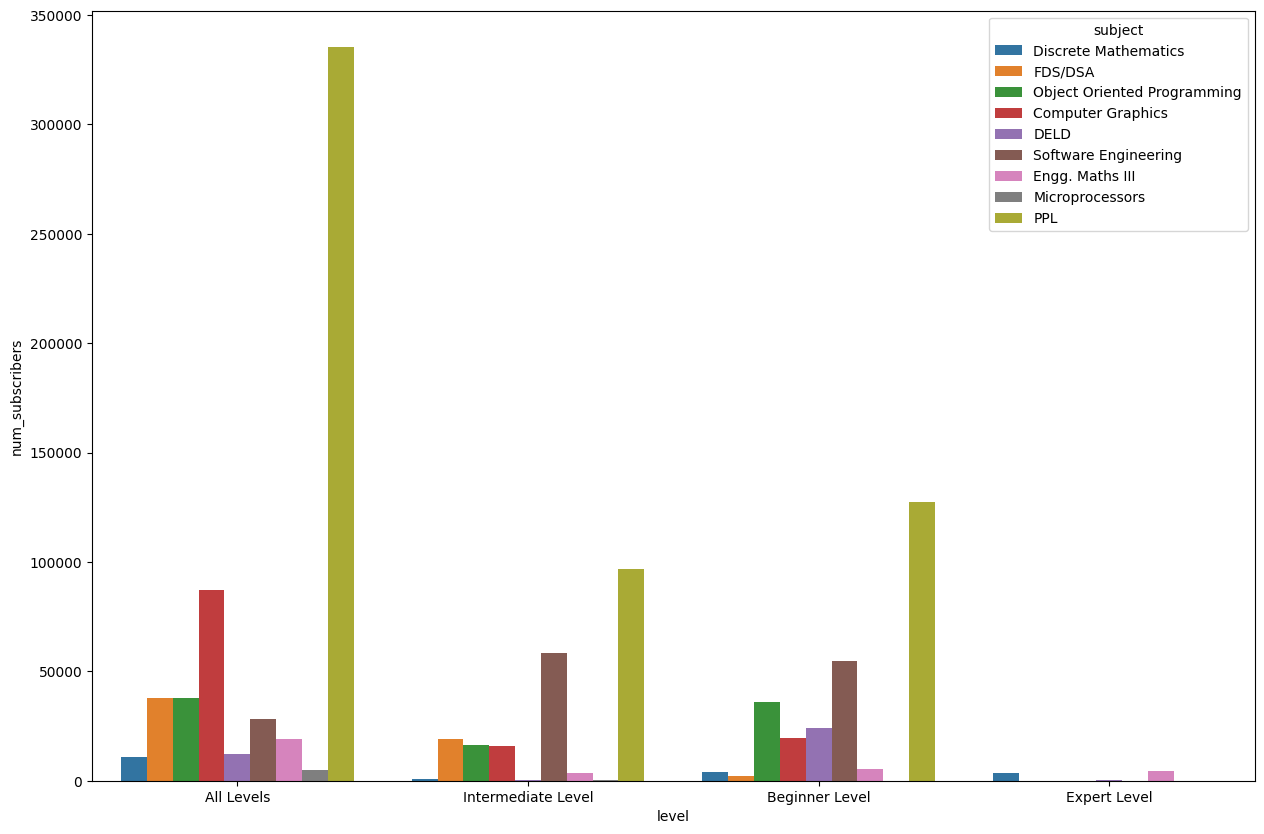

In [41]:
#using seaborn
plt.figure(figsize=(15,10))
sns.barplot(x='level',y='num_subscribers', hue='subject', data=df, ci=None)
plt.show()

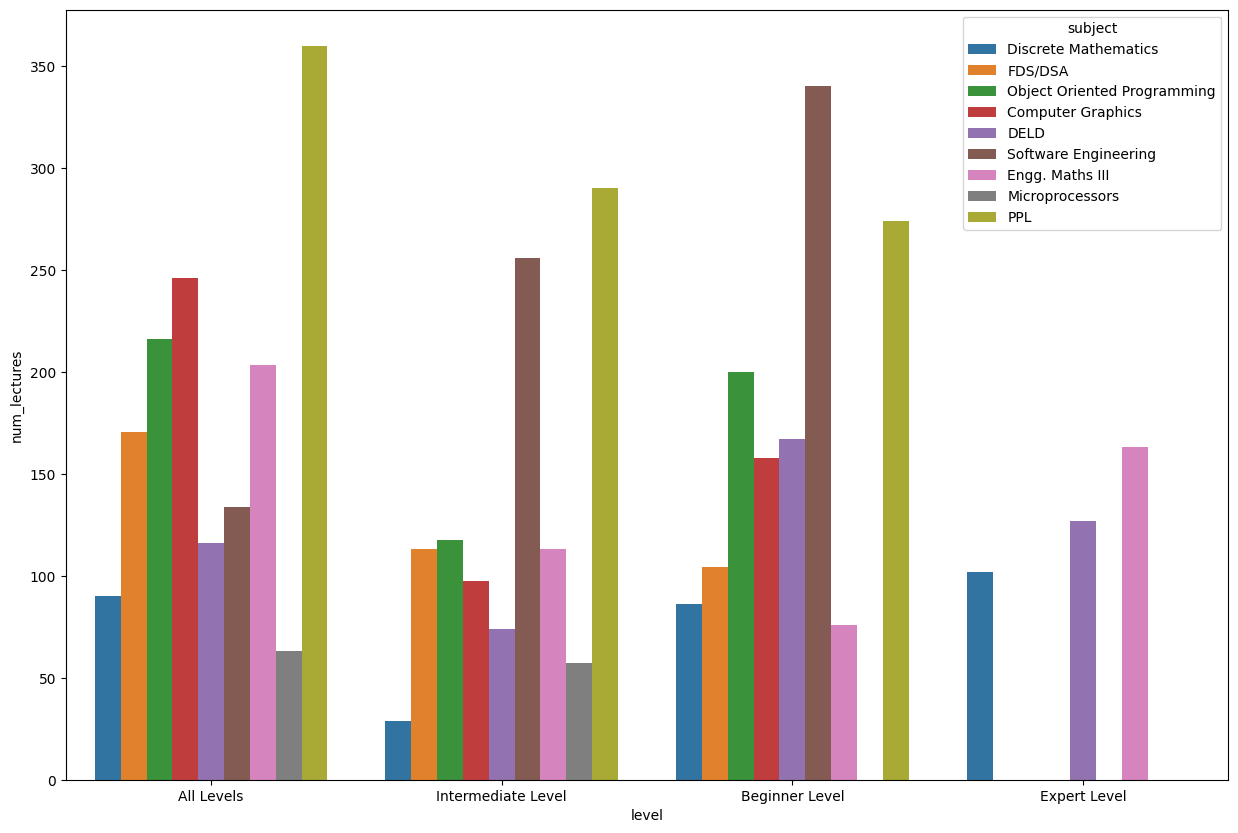

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(x='level',y='num_lectures', hue='subject', data=df, ci=None)
plt.show()

In [51]:
def plot_num_of_countable_feature(feature):
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject', data=df, ci=None)
    plt.show()
    plt.figure(figsize=(10,7))
    #How many subscribers per level
    plt.title("Plot of {} per level".format(feature))
    df.groupby('level')[feature].sum().plot(kind='pie')
    plt.show()

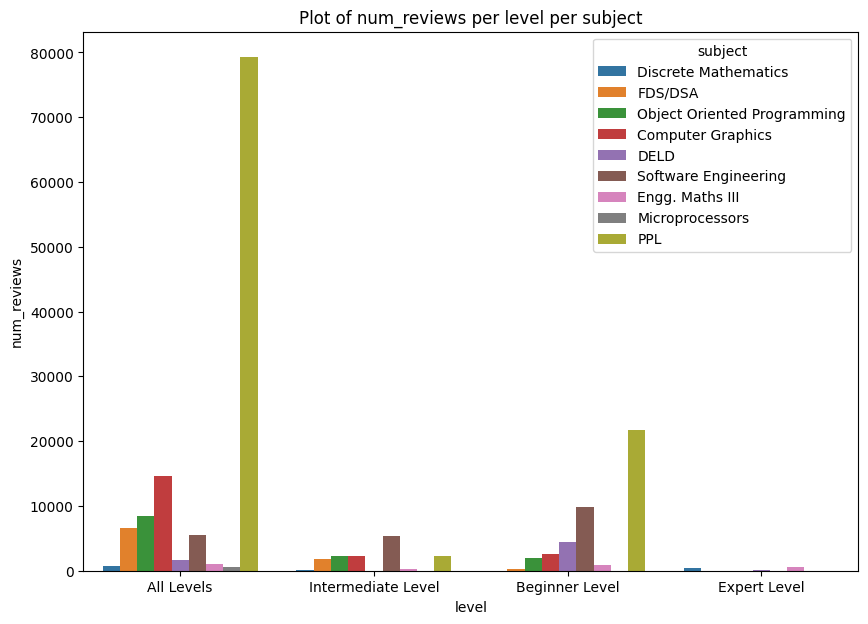

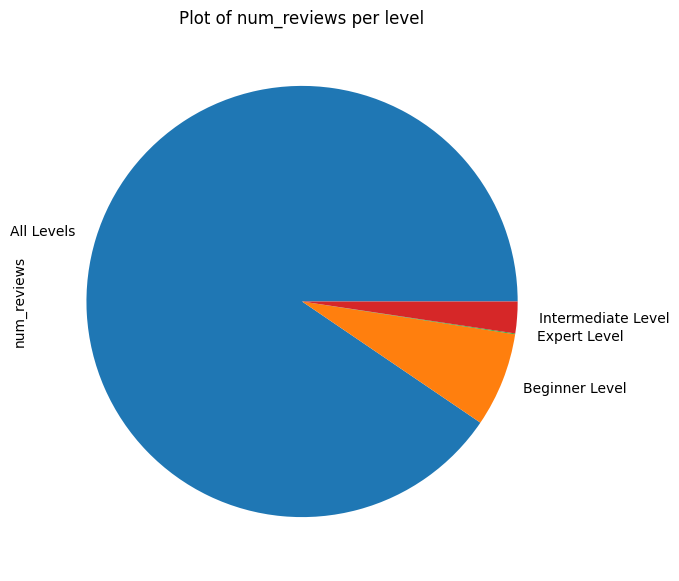

In [52]:
#Plot for lectures * reviews
plot_num_of_countable_feature('num_reviews')

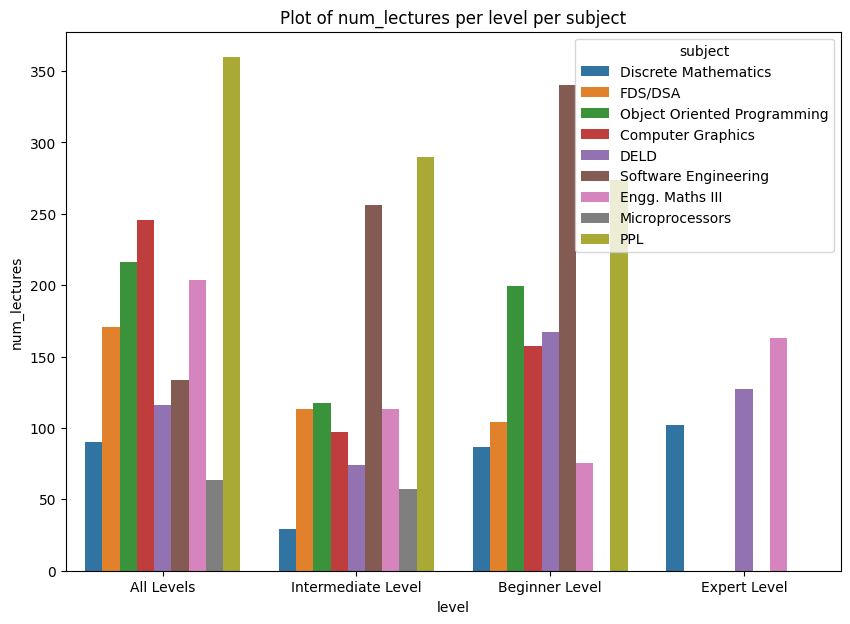

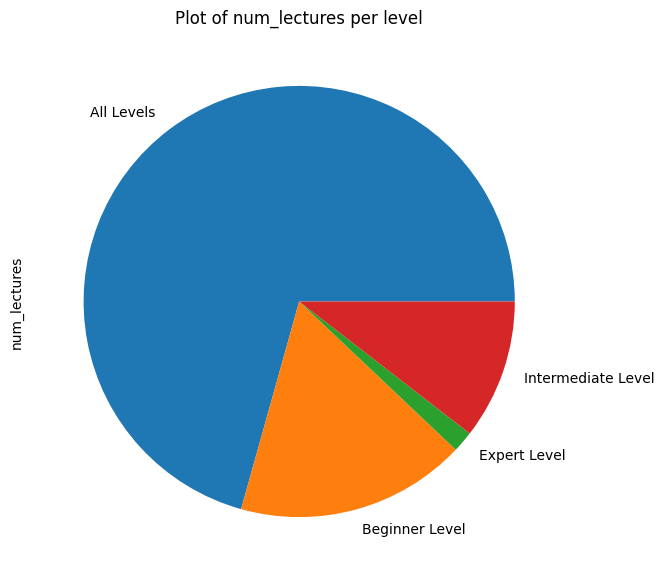

In [53]:
plot_num_of_countable_feature('num_lectures')

In [54]:
df['price']

0      3099
1      2499
2      2299
3      2999
4      3099
       ... 
136    2999
137    1999
138    3099
139    3099
140    2499
Name: price, Length: 141, dtype: int64

In [55]:
df['price'].mean()

2803.255319148936

In [56]:
df['price'].max()

3999

In [57]:
df['price'].idxmax()

15

In [58]:
df.iloc[15]

Unnamed: 0                                                         16
course_id                                                     1318550
course_title        Sets, Relations, Functions & Discrete Mathemat...
url                 https://www.udemy.com/course/discrete-math-set...
is_paid                                                          True
price                                                            3999
num_subscribers                                                  3543
num_reviews                                                       242
num_lectures                                                       62
level                                                      All Levels
content_duration                                            6.5 hours
subject                                          Discrete Mathematics
Name: 15, dtype: object

In [59]:
# What is the most profitable course
# price x num_subcribers
df['profit'] = df['price'] * df['num_subscribers']

In [61]:
#Most profitable course
df['profit'].idxmax()

127

In [62]:
df.iloc[127]

Unnamed: 0                                                        128
course_id                                                      851712
course_title        The Complete JavaScript Course 2024: From Zero...
url                 https://www.udemy.com/course/the-complete-java...
is_paid                                                          True
price                                                            3499
num_subscribers                                                898555
num_reviews                                                    203691
num_lectures                                                      321
level                                                      All Levels
content_duration                                           68.5 hours
subject                                                           PPL
profit                                                     3144043945
Name: 127, dtype: object

### Correlation Questions
+ Does no. of subscribers depend upon
  - number of reviews
  - price
  - number of lectures
  - content duration

<Axes: xlabel='price', ylabel='num_subscribers'>

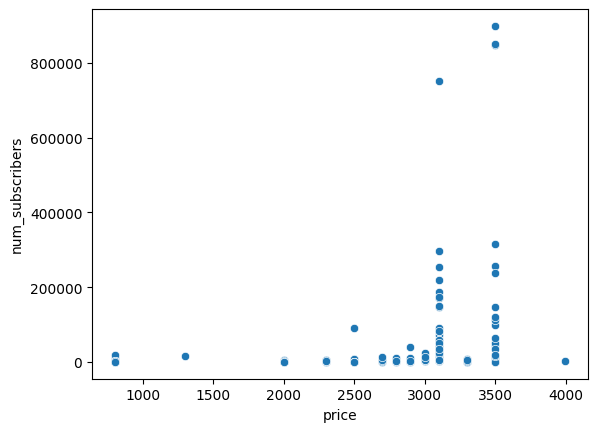

In [64]:
sns.scatterplot(data=df,x='price',y='num_subscribers')

<Axes: xlabel='price', ylabel='num_reviews'>

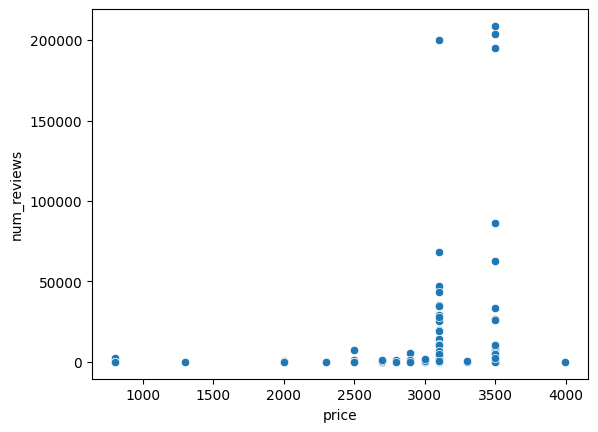

In [65]:
sns.scatterplot(data=df,x='price',y='num_reviews')

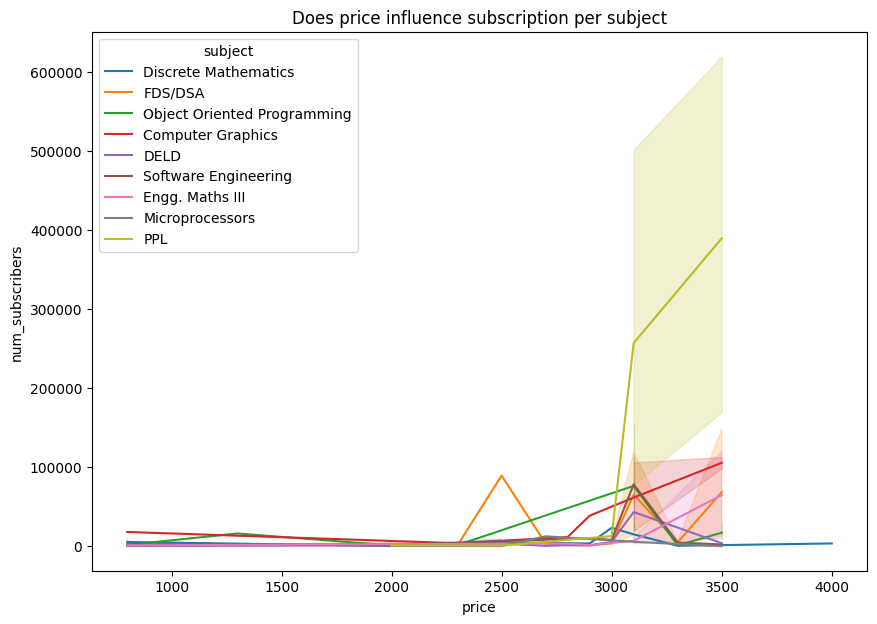

In [68]:
plt.figure(figsize=(10,7))
plt.title("Does price influence subscription per subject")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

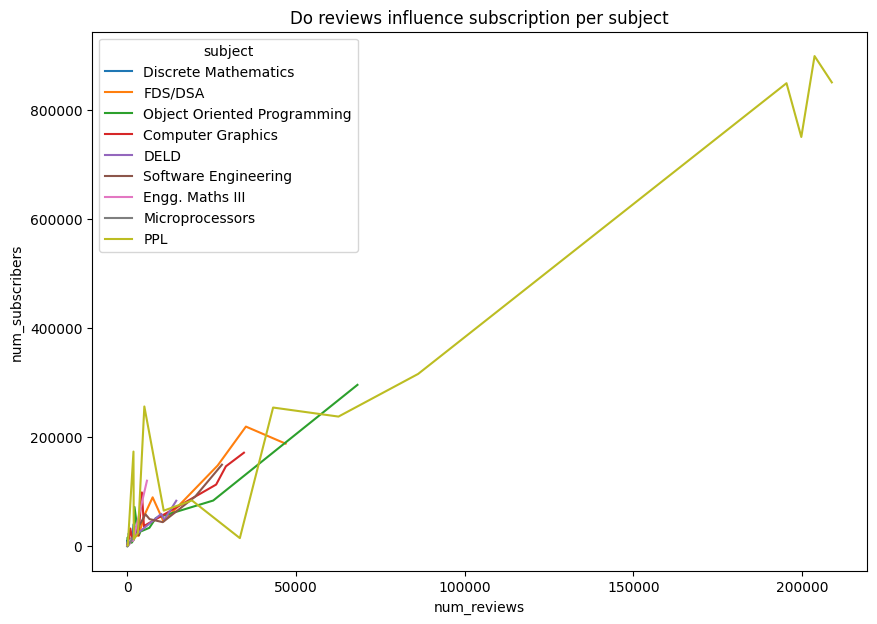

In [70]:
plt.figure(figsize=(10,7))
plt.title("Do reviews influence subscription per subject")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()